In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("data.csv")
data.shape

(77, 31)

In [2]:
X = data.iloc[:,1:30]  
y = data.iloc[:,-1]    


In [3]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [4]:
print(model.feature_importances_)

[0.03444658 0.04764777 0.04972672 0.04820076 0.0190851  0.01847955
 0.01888635 0.02021818 0.0312539  0.03053493 0.02420905 0.02448191
 0.01631985 0.04601161 0.04794022 0.04721737 0.0404009  0.03050289
 0.04997686 0.05992127 0.05432412 0.04098079 0.02318631 0.03584495
 0.02172858 0.025526   0.02398954 0.0332192  0.03573873]


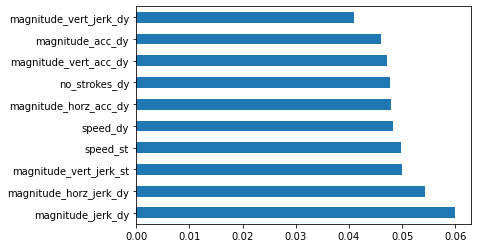

In [5]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [12]:
feat_importances.nlargest(10)


magnitude_jerk_dy         0.059921
magnitude_horz_jerk_dy    0.054324
magnitude_vert_jerk_st    0.049977
speed_st                  0.049727
speed_dy                  0.048201
magnitude_horz_acc_dy     0.047940
no_strokes_dy             0.047648
magnitude_vert_acc_dy     0.047217
magnitude_acc_dy          0.046012
magnitude_vert_jerk_dy    0.040981
dtype: float64

In [16]:
features=data[['magnitude_jerk_dy','magnitude_horz_jerk_dy','magnitude_vert_jerk_st','speed_st','speed_dy','magnitude_horz_acc_dy',
    'no_strokes_dy','magnitude_vert_acc_dy','magnitude_acc_dy','magnitude_vert_jerk_dy']]
features.head(2)

,magnitude_jerk_dy,magnitude_horz_jerk_dy,magnitude_vert_jerk_st,speed_st,speed_dy,magnitude_horz_acc_dy,no_strokes_dy,magnitude_vert_acc_dy,magnitude_acc_dy,magnitude_vert_jerk_dy
0,0.000010,0.000006,0.000005,0.000293,0.000431,0.000305,2.0,0.000282,0.000466,0.000006
1,0.000015,0.000010,0.000007,0.000286,0.000281,0.000510,6.0,0.000409,0.000728,0.000009


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)

In [19]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=5)

In [21]:
lr=cross_val_score(LogisticRegression(),x_train,y_train)
xgbc=cross_val_score(XGBRFClassifier(),x_train,y_train)
xgb=cross_val_score(XGBClassifier(),x_train,y_train)
svm=cross_val_score(SVC(),x_train,y_train)

dtc=cross_val_score(DecisionTreeClassifier(),x_train,y_train)
adb=cross_val_score(AdaBoostClassifier(),x_train,y_train)
etc=cross_val_score(ExtraTreesClassifier(),x_train,y_train)
gbc=cross_val_score(GradientBoostingClassifier(),x_train,y_train)
rfc=cross_val_score(RandomForestClassifier(),x_train,y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:02:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:02:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:02:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:02:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:02:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
print('log reg',lr,lr.mean())
print('xgb',xgb,xgb.mean())
print('svm',svm,svm.mean())
#print('nb',nb,nb.mean)
print('dtc',dtc,dtc.mean())
print('adb',adb,adb.mean())
#print('bbc',bbc,bbc.mean())
print('etc',etc,etc.mean())
print('gbc',gbc,gbc.mean())
print('rfc',rfc,rfc.mean())

log reg [0.76923077 0.83333333 0.83333333 0.83333333 0.75      ] 0.803846153846154
xgb [0.92307692 0.83333333 0.91666667 0.91666667 1.        ] 0.9179487179487179
svm [0.76923077 0.83333333 0.83333333 0.83333333 0.75      ] 0.803846153846154
dtc [0.92307692 0.83333333 0.91666667 0.91666667 1.        ] 0.9179487179487179
adb [0.92307692 0.83333333 0.91666667 0.91666667 1.        ] 0.9179487179487179
etc [0.92307692 1.         1.         0.91666667 1.        ] 0.9679487179487178
gbc [0.92307692 0.83333333 0.91666667 0.91666667 1.        ] 0.9179487179487179
rfc [0.92307692 1.         0.91666667 0.91666667 1.        ] 0.9512820512820512


In [23]:
model=XGBClassifier()
model.fit(x_train,y_train)

[14:03:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
y_predtr=model.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

98.36065573770492


In [25]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

87.5


In [26]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
y_predtr=model.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

100.0


In [28]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

87.5


In [29]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_predtr=model.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

80.32786885245902


In [31]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

81.25


In [32]:
model=ExtraTreesClassifier()
model.fit(x_train,y_train)


ExtraTreesClassifier()

In [33]:
y_predtr=model.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

100.0


In [34]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

93.75
